> Each stage of the CRISP-DM process will be looked at in this notebook. These stages are:

>1.Business Understanding   
>2.Data Understanding       
>3.Prepare Data    
>4.Data Modeling     
>5.Evaluate the Results
## 1. Business Understanding
>In this notebook, I will be exploring the 2017 Stack Overflow results in order to glean some information on professional developers in Nigeria and what to focus on to have the best career.
>There will be three questions I will seek to answer in order to get this information:
>1. What are the most common languages, framework, and databases used by professionals in Nigeria
>2. What are the most want work languages and framework by professionals in Nigeria
>3. Which programming language has the highest job satisfaction
## 2. Data Understanding
> In order to gain some understanding of the data I loaded it into a dataframe and ran df.head(). This gave me 5 example entries of each column. I also filter the Country to Nigeria.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# Reading Stackoverflow survey data
df = pd.read_csv('survey_results_public.csv')
df.head()

,Respondent,Professional,ProgramHobby,Country,University,EmploymentStatus,FormalEducation,MajorUndergrad,HomeRemote,CompanySize,...,StackOverflowMakeMoney,Gender,HighestEducationParents,Race,SurveyLong,QuestionsInteresting,QuestionsConfusing,InterestedAnswers,Salary,ExpectedSalary
0,1,Student,"Yes, both",United States,No,"Not employed, and not looking for work",Secondary school,NaN,NaN,NaN,...,Strongly disagree,Male,High school,White or of European descent,Strongly disagree,Strongly agree,Disagree,Strongly agree,NaN,NaN
1,2,Student,"Yes, both",United Kingdom,"Yes, full-time",Employed part-time,Some college/university study without earning ...,Computer science or software engineering,"More than half, but not all, the time",20 to 99 employees,...,Strongly disagree,Male,A master's degree,White or of European descent,Somewhat agree,Somewhat agree,Disagree,Strongly agree,NaN,37500.0
2,3,Professional developer,"Yes, both",United Kingdom,No,Employed full-time,Bachelor's degree,Computer science or software engineering,"Less than half the time, but at least one day ...","10,000 or more employees",...,Disagree,Male,A professional degree,White or of European descent,Somewhat agree,Agree,Disagree,Agree,113750.0,NaN
3,4,Professional non-developer who sometimes write...,"Yes, both",United States,No,Employed full-time,Doctoral degree,A non-computer-focused engineering discipline,"Less than half the time, but at least one day ...","10,000 or more employees",...,Disagree,Male,A doctoral degree,White or of European descent,Agree,Agree,Somewhat agree,Strongly agree,NaN,NaN
4,5,Professional developer,"Yes, I program as a hobby",Switzerland,No,Employed full-time,Master's degree,Computer science or software engineering,Never,10 to 19 employees,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### Question 1: What are the most common languages, framework and databases used by professionals in Nigeria
## 3. Prepare Data
The data will be prepared here by selecting the desired columns and only using the rows where a professional devloper was taking the survey

All rows were dropped where the Professional column did not equal "Professional Developer" as I was only interested in Professional Developers. This was the only way in which I needed to handle Nan values and categorical values.

In [3]:
# filter the data
data = df[df.Country == "Nigeria"]
data.head()

,Respondent,Professional,ProgramHobby,Country,University,EmploymentStatus,FormalEducation,MajorUndergrad,HomeRemote,CompanySize,...,StackOverflowMakeMoney,Gender,HighestEducationParents,Race,SurveyLong,QuestionsInteresting,QuestionsConfusing,InterestedAnswers,Salary,ExpectedSalary
1180,1181,Professional developer,"Yes, both",Nigeria,No,Employed full-time,Bachelor's degree,A non-computer-focused engineering discipline,All or almost all the time (I'm full-time remote),"1,000 to 4,999 employees",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1399,1400,Professional developer,"Yes, I program as a hobby",Nigeria,No,"Independent contractor, freelancer, or self-em...",Secondary school,NaN,"More than half, but not all, the time",NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1420,1421,Student,"Yes, both",Nigeria,"Yes, full-time","Independent contractor, freelancer, or self-em...",Secondary school,NaN,It's complicated,NaN,...,Disagree,Male,A master's degree,Black or of African descent,Somewhat agree,Strongly agree,Disagree,Strongly agree,NaN,5718.824464
1453,1454,Professional non-developer who sometimes write...,"Yes, I contribute to open source projects",Nigeria,"Yes, full-time","Independent contractor, freelancer, or self-em...",Some college/university study without earning ...,A humanities discipline,"More than half, but not all, the time",NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1581,1582,Professional developer,"Yes, I program as a hobby",Nigeria,No,Employed full-time,Master's degree,Computer science or software engineering,All or almost all the time (I'm full-time remote),100 to 499 employees,...,Disagree,Male,A master's degree,Black or of African descent,Somewhat agree,Agree,Strongly disagree,Agree,4117.553614,NaN


In [4]:
#selecting the desired columns
data_df = data[['Professional', 'HaveWorkedLanguage','WantWorkLanguage', 'HaveWorkedFramework', 'HaveWorkedDatabase', 
                'Methodology', 'HaveWorkedPlatform','JobSatisfaction','WantWorkFramework']]

data_df = data_df[data_df.Professional == "Professional developer"]
data_df.head()

,Professional,HaveWorkedLanguage,WantWorkLanguage,HaveWorkedFramework,HaveWorkedDatabase,Methodology,HaveWorkedPlatform,JobSatisfaction,WantWorkFramework
1180,Professional developer,NaN,NaN,NaN,NaN,NaN,NaN,7.0,NaN
1399,Professional developer,Java; JavaScript; PHP; Python,Common Lisp; Go; Haskell,AngularJS; Node.js; Firebase,Redis; MySQL; SQLite,Agile,Amazon Web Services (AWS),7.0,Hadoop; Cordova; Xamarin
1581,Professional developer,Java; JavaScript; PHP; SQL; Swift,C#; CoffeeScript; Dart; Go; Python; Ruby,AngularJS; Node.js; Firebase,MongoDB; MySQL; PostgreSQL,NaN,Android; Windows Desktop; Linux Desktop,8.0,React; Cordova
1669,Professional developer,C; JavaScript; PHP; Python; SQL,C; Go; JavaScript; PHP; Python; SQL; TypeScript,Node.js; React,PostgreSQL; SQLite,NaN,Linux Desktop; WordPress; Amazon Web Services ...,6.0,AngularJS; Node.js; React; Firebase
3158,Professional developer,Java,JavaScript; Python; Scala,NaN,MySQL,NaN,Android; Amazon Web Services (AWS),3.0,Node.js


## 4. Data Modelling
#### The most commonly used languages are displayed here

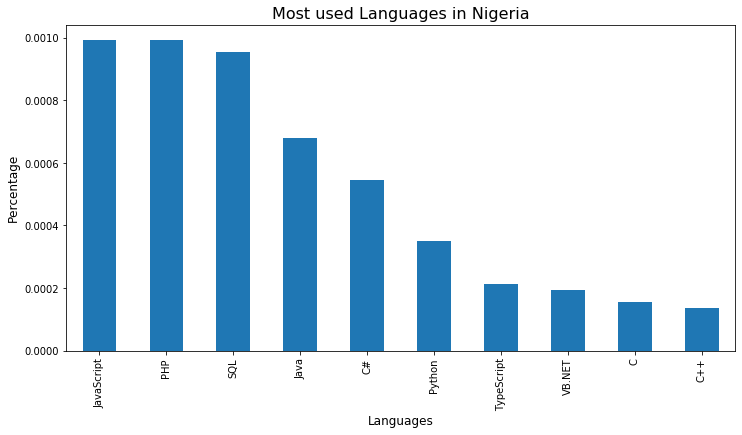

In [15]:
languages = data_df['HaveWorkedLanguage'].str.split('; ', expand=True).stack().value_counts()
plt.figure(figsize=(12,6))
(languages[:10]/df.shape[0]).plot(kind="bar");
plt.xlabel("Languages", fontsize = 12)
plt.ylabel("Percentage", fontsize = 12)
plt.title("Most used Languages in Nigeria", size = 16);


#### The most commonly used framework are displayed here

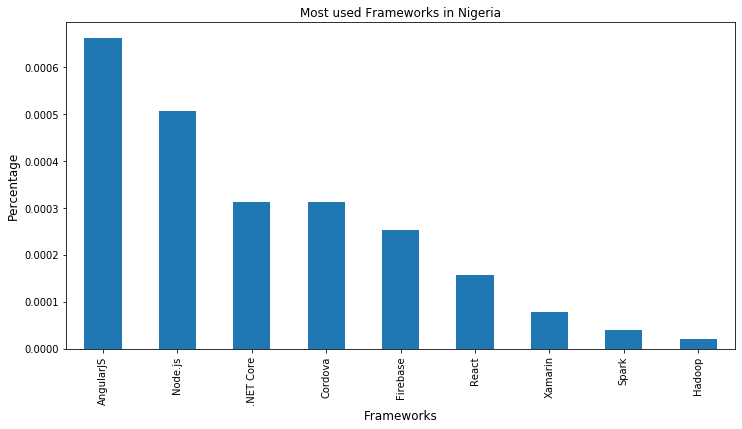

In [6]:
frameworks = data_df['HaveWorkedFramework'].str.split('; ', expand=True).stack().value_counts()
plt.figure(figsize=(12,6))
(frameworks[:10]/df.shape[0]).plot(kind="bar");
plt.xlabel("Frameworks", fontsize = 12)
plt.ylabel("Percentage", fontsize = 12)

plt.title("Most used Frameworks in Nigeria");

#### The most commonly used databases are displayed here

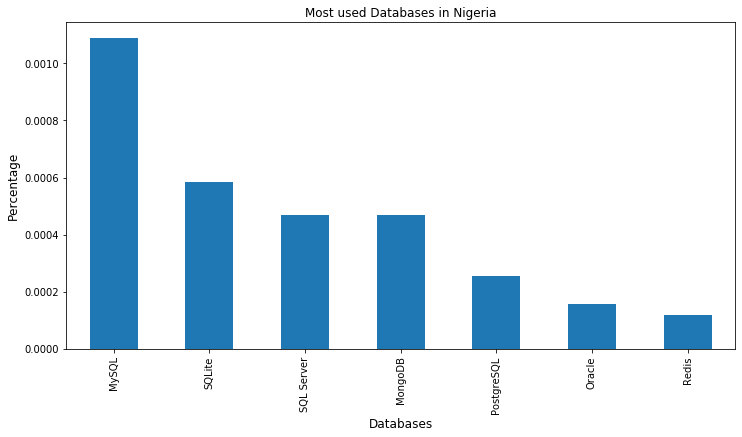

In [7]:
databases = data_df['HaveWorkedDatabase'].str.split('; ', expand=True).stack().value_counts()
plt.figure(figsize=(12,6))
(databases[:10]/df.shape[0]).plot(kind="bar");
plt.xlabel("Databases", fontsize = 12)
plt.ylabel("Percentage", fontsize = 12)

plt.title("Most used Databases in Nigeria");

## 5. Evaluate the Results
From the charts above we can see that:
JavaScript,PHP,SQL,Java,and C# are the most used languages by professional developers and therefore would be the most in demand and transferable skill between jobs. To support this, the most used frameworks are mostly JavaScript based. MySQL is also the most popular used  database by professional developers in Nigeria.

## Question 2: What are the most want work languages and framework by professionals in Nigeria

#### The most want want languages are displayed here

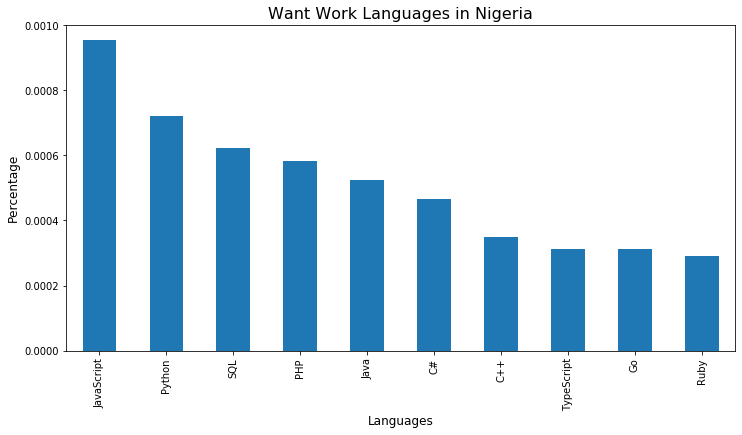

In [16]:
want_work_lang = data_df['WantWorkLanguage'].str.split('; ', expand=True).stack().value_counts()
plt.figure(figsize=(12,6))
(want_work_lang[:10]/df.shape[0]).plot(kind="bar");
plt.xlabel("Languages", fontsize = 12)
plt.ylabel("Percentage", fontsize = 12)
plt.title("Want Work Languages in Nigeria", size = 16);

#### The most want work framework are displayed here

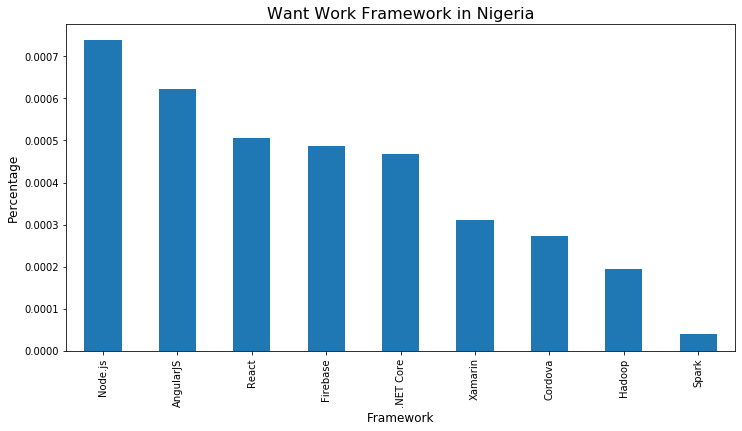

In [17]:
want_work_frame = data_df['WantWorkFramework'].str.split('; ', expand=True).stack().value_counts()
plt.figure(figsize=(12,6))
(want_work_frame[:10]/df.shape[0]).plot(kind="bar");
plt.xlabel("Framework", fontsize = 12)
plt.ylabel("Percentage", fontsize = 12)
plt.title("Want Work Framework in Nigeria", size = 16);

As we can see from this chart,The most want want programming language in Nigeria is Javascript,Python and SQL. while the most want work Framework is Node.js and AngularJS which are Javascript based.

## Question 3: Which programming language has the highest job satisfaction

In [10]:
# selecting the necessary columns
data_df2 = data_df[[ 'HaveWorkedLanguage', 'JobSatisfaction']]
data_df2 = data_df2.dropna(subset=['HaveWorkedLanguage','JobSatisfaction'], axis=0)
data_df2.head()

,HaveWorkedLanguage,JobSatisfaction
1399,Java; JavaScript; PHP; Python,7.0
1581,Java; JavaScript; PHP; SQL; Swift,8.0
1669,C; JavaScript; PHP; Python; SQL,6.0
3158,Java,3.0
3751,Haskell,5.0


In [11]:
def split_column(column_to_split, delimeter, column_to_store, df):
    """
    Method to split a columns values by a provided delimeter while
    retaining the associated value of another column.
    
    :param str column_to_split: column whose values are to be split
    :param str delimeter: delimeter to split by
    :param str columns_to_store: column who's data must be stored along split rows
    :param DataFrame df: dataframe to use
    """
    split_col = pd.DataFrame(columns = [column_to_split, column_to_store])
    for index, row in df.iterrows():
        columns = row[column_to_split].split(delimeter)

        for c in columns:
            split_col.loc[len(split_col)] = [c, row[column_to_store]]
    return split_col

In [12]:
#Split the columns
split_lang = split_column('HaveWorkedLanguage', '; ', 'JobSatisfaction', data_df2)
split_lang['HaveWorkedLanguage'].unique()

array(['Java', 'JavaScript', 'PHP', 'Python', 'SQL', 'Swift', 'C',
       'Haskell', 'C++', 'Go', 'C#', 'Matlab', 'TypeScript',
       'CoffeeScript', 'VB.NET', 'VBA', 'Visual Basic 6', 'F#',
       'Objective-C', 'Ruby', 'Elixir', 'Assembly', 'Scala', 'Perl', 'R',
       'Smalltalk'], dtype=object)

In [13]:
q3_answer = split_lang.groupby(['HaveWorkedLanguage']).mean()['JobSatisfaction'].sort_values(ascending=False)
q3_answer.head(50)

HaveWorkedLanguage
C++               8.285714
Objective-C       8.000000
Go                8.000000
F#                8.000000
C                 7.625000
Visual Basic 6    7.166667
PHP               6.489796
Matlab            6.400000
SQL               6.234043
JavaScript        6.200000
Python            6.058824
C#                6.037037
VBA               6.000000
Swift             6.000000
TypeScript        5.800000
Java              5.771429
Ruby              5.666667
CoffeeScript      5.500000
VB.NET            5.300000
Haskell           5.000000
Smalltalk         5.000000
Scala             4.666667
R                 4.500000
Elixir            4.000000
Assembly          3.666667
Perl              0.000000
Name: JobSatisfaction, dtype: float64

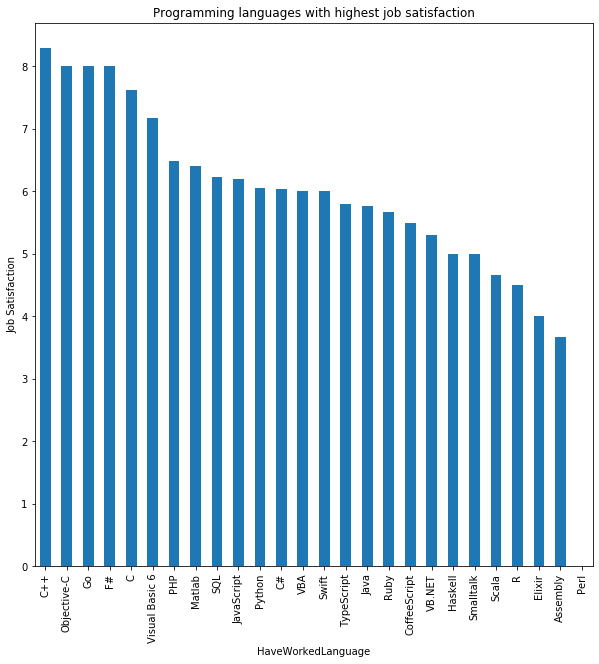

In [14]:
plt.figure(figsize=(10,10))
q3_answer.plot(kind = 'bar')
plt.title('Programming languages with highest job satisfaction')
plt.ylabel('Job Satisfaction');

We can see from the chart above that the top five programming language that has job satisfaction in Nigeria according to Stackoverflow’s 2017 Annual Developer Survey data are C++,Objective-C,Go,F# and C.

## Conclusion
In this Survey, we took a look at what were the most popular languages, framework, database  and most want work programming languages, according to Stackoverflow’s 2017 Annual Developer Survey data.

1. We have seen that some older programming languages such as PHP,JavaScript, SQL, and Java still dominates.
2. Younger programming languages like Python have been well-deserved to be learned, but the oldest ones still have their value and are being much demanded.
3. The most used and most want work framework in Nigeria are JavaScript based.
